Linear Model

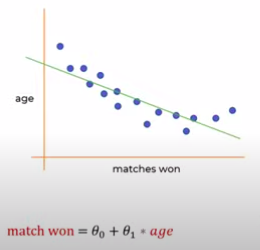

Polynomial model

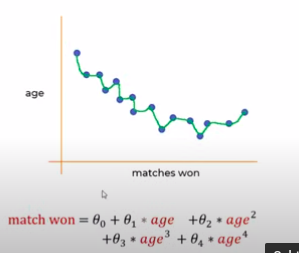

Balanced Model

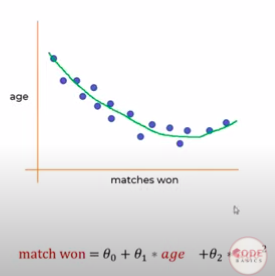

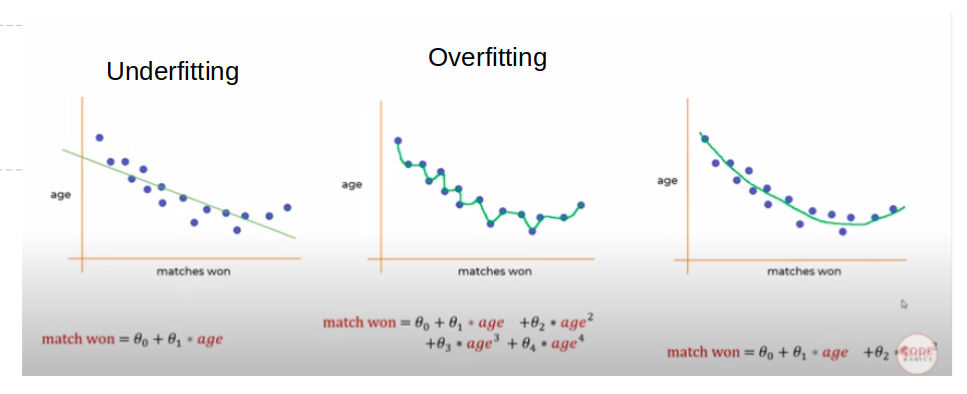

To measure the error, we will use **Mean Square Error**, defined as follows:

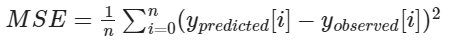

Moreover, we could prove that this error can be decomposed into the sum of three quantities:

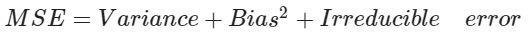

**High bias:**


*   Model assumptions fail to explain the relationship between predictors and outcome.
*   Involves “simpler” (less flexible) models, such as linear regression.
*   Leads to underfitting (poor train set performances).






**High variance:**
- Involves more “complex” models (more flexible), such as decision trees.
- Leads to overfitting (poor test set performances).



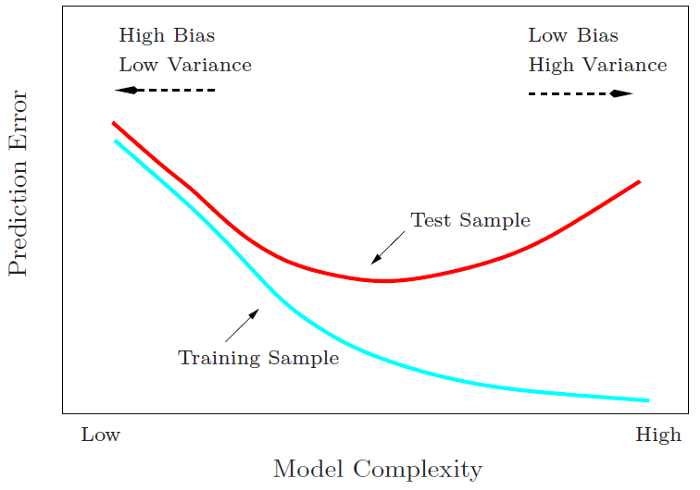

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from math import pi as PI
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

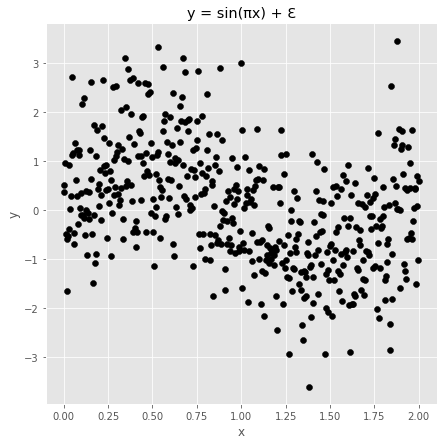

In [ ]:
plt.style.use('ggplot')

# number of observations
NUM_OBS = 500

#creating synthetic dataset
# predictors
x = np.linspace(0, 2, num = NUM_OBS)
# noise
eps = np.random.normal(0, 1, NUM_OBS)
# outcome
y = np.sin(PI*x) + eps

fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x, y, c = 'k')

We split our original data into train (80%) and test (20%) set as follows:

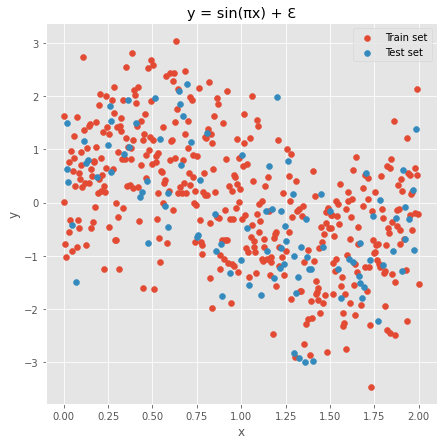

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

fig = plt.figure(figsize = (7,7))
ax = plt.axes()
ax.set_title('y = sin(πx) + Ɛ')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(x_train, y_train, label = "Train set")
ax.scatter(x_test, y_test, label = "Test set")
ax.legend()

We fit multiple polynomial models with increasing polynomial degree on the train set, and then observe the trend of the MSE over the increasing model complexity:

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


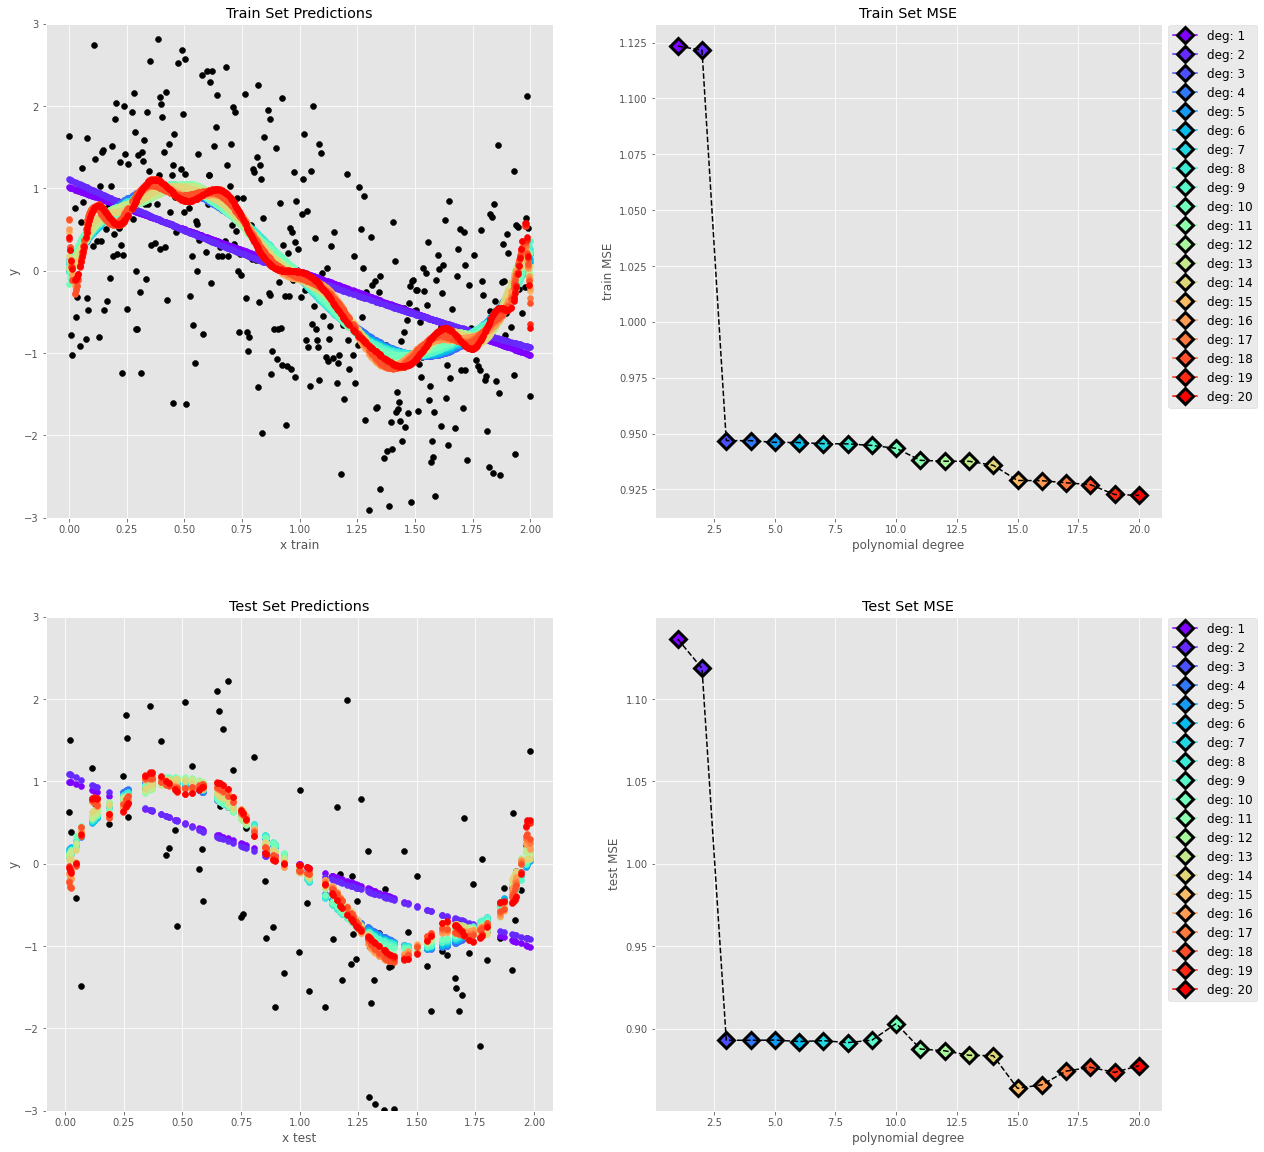

In [ ]:
# number of polynomial models to investigate
NUM_MODELS = 20

colors = iter(plt.cm.rainbow(np.linspace(0, 1, NUM_MODELS)))

fig, axs = plt.subplots(2, 2, figsize = (20,20))

axs[0, 0].set_title('Train Set Predictions')
axs[1, 0].set_title('Test Set Predictions')
axs[0, 1].set_title('Train Set MSE')
axs[1, 1].set_title('Test Set MSE')

axs[0, 0].set_xlabel("x train")
axs[0, 0].set_ylabel("y")
axs[0, 0].set_ylim([-3, 3])

axs[1, 0].set_xlabel("x test")
axs[1, 0].set_ylabel("y")
axs[1, 0].set_ylim([-3, 3])

axs[0, 1].set_xlabel("polynomial degree")
axs[0, 1].set_ylabel("train MSE")

axs[1, 1].set_xlabel("polynomial degree")
axs[1, 1].set_ylabel("test MSE")

axs[0,0].scatter(x_train, y_train, c = 'k', label = "y train")
axs[1,0].scatter(x_test, y_test, c = 'k', label = "y test")

#To calculate the MSE
train_mse = []
test_mse = []

for k in range(0, NUM_MODELS):

  c = next(colors)

  # k-th degree polynomial coefficients
  fit_coeff = np.polyfit(x_train, y_train, deg = k+1)

  # train and test k-th degree polynomial fit
  y_train_pred = np.polyval(fit_coeff, x_train)
  y_test_pred = np.polyval(fit_coeff, x_test)

  # plot train and test k-th degree polynomial fit
  axs[0,0].scatter(x_train,
                   y_train_pred,
                   color = c,
                   label = "deg: {}".format(k+1))
  
  axs[1,0].scatter(x_test,
                   y_test_pred,
                   color = c,
                   label = "deg: {}".format(k+1))

  # train and test MSE of k-th degree polynomial fit 
  iter_train_mse = mean_squared_error(y_train_pred, y_train)
  iter_test_mse = mean_squared_error(y_test_pred, y_test)

  train_mse.append(iter_train_mse)
  test_mse.append(iter_test_mse)

  # plot train and test MSE of k-th degree polynomial fit
  axs[0,1].plot(k+1,
                iter_train_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)
  
  axs[1,1].plot(k+1,
                iter_test_mse,
                color = c,
                label = "deg: {}".format(k+1),
                marker = 'D',
                markersize = 12,
                markeredgecolor = 'black',
                markeredgewidth = 3)

# plot dashed line to interpolate MSE measures
axs[0,1].plot(range(1,NUM_MODELS+1), train_mse, 'k--')
axs[1,1].plot(range(1,NUM_MODELS+1), test_mse, 'k--')

# draw legends
axs[0,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})
axs[1,1].legend(loc = "upper right",
                bbox_to_anchor = (1.2, 1.01),
                prop = {'size': 12})


# **Regularization**
Regularization is a technique used to add more bias to a model. Adding bias prevents the model from learning the training data too well by adding information to the objective function. The idea is to create a model that is able to generalize to new instances accurately while maintaining a strong performance on the data it was trained on.

**L1 Regularization**
The L1 norm (also known as Lasso for regression tasks) shrinks some parameters towards 0 to tackle the overfitting problem. Many also use this method of regularization as a form of feature selection since multiplying any feature value by 0 is equal to 0 — thus, the feature becomes obsolete. Essentially, a selection of the input features would have weights that are equal to zero, whereas the rest would be non-zero values.

**L2 Regularization**
In contrast, the L2 norm (or Ridge for regression problems), tackles the overfitting problem by forcing weights to be small, but not exactly 0. Thus, less significant features will still have a small influence on the final prediction, however, the influence is very small.

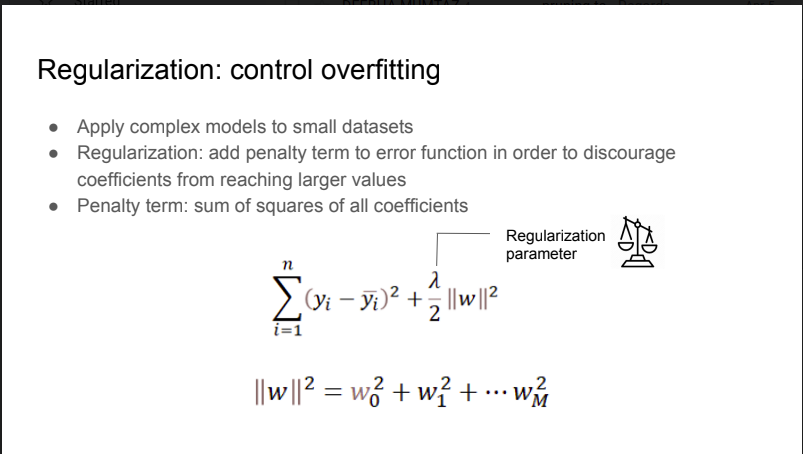

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# selecting a single feature
# using 100 instances for simplicity
X = df.loc[:100, 5]
y = df.loc[:100, 13] # target label

In [ ]:
# reshaping the data 
X_reshaped = X[:, np.newaxis]
y_reshaped = y[:, np.newaxis]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


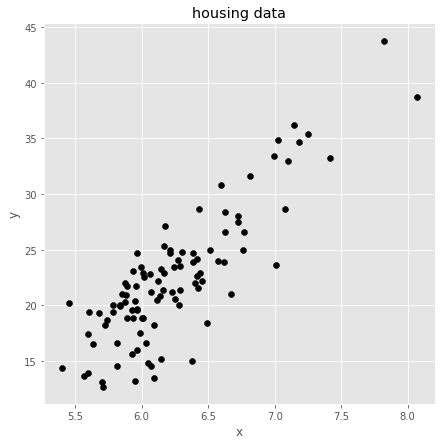

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
ax.set_title('housing data')
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_reshaped, y_reshaped, c = 'k')

In [ ]:
# instantiating the lasso regression model
lasso = Lasso(alpha=5)

In [ ]:
# training the model
lasso.fit(X_reshaped, y_reshaped)

Lasso(alpha=5)

In [ ]:
# making predictions 
y_pred = lasso.predict(X_reshaped)

In [ ]:
# evaluating the model
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {lasso.coef_}\n")

Mean Squared Error: 34.709124595627884
Model Coefficients: [0.]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


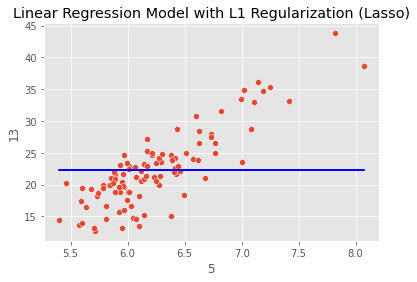

In [ ]:
# plotting the line of best fit
sns.scatterplot(X,y)
plt.plot(X_reshaped, y_pred, color="blue")
plt.title("Linear Regression Model with L1 Regularization (Lasso)")
plt.show() 

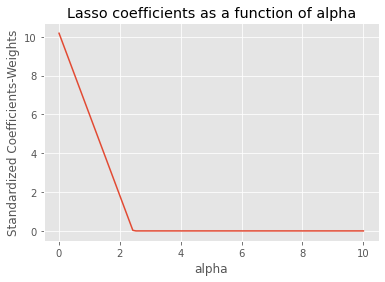

In [ ]:
alphas = np.linspace(0.01,10,100)
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_reshaped, y_reshaped)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
#ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients-Weights')
plt.title('Lasso coefficients as a function of alpha');

In [ ]:
from sklearn.linear_model import Ridge
# instantiating the ridge regression model
ridge = Ridge(alpha=100)

In [ ]:
# training the model
ridge.fit(X_reshaped, y_reshaped)

Ridge(alpha=100)

In [ ]:
# making predictions 
y_pred = ridge.predict(X_reshaped)

In [ ]:
# evaluating the model
mse = mean_squared_error(y_reshaped, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {ridge.coef_}\n")

Mean Squared Error: 25.96309109305436
Model Coefficients: [[1.98542524]]



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


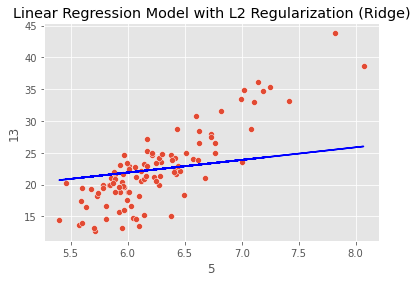

In [ ]:
# plotting the line of best fit
sns.scatterplot(X,y)
plt.plot(X_reshaped, y_pred, color="blue")
plt.title("Linear Regression Model with L2 Regularization (Ridge)")
plt.show() 

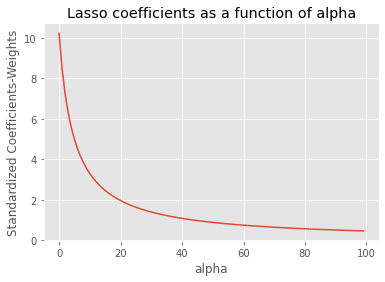

In [ ]:
alphas = np.linspace(0.01,500,100)
ridge = Ridge(max_iter=10000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_reshaped, y_reshaped)
    coefs.append(ridge.coef_)
    #print(ridge.coef_)

ax = plt.gca()

flat_list = [item for sublist in coefs for item in sublist]
ax.plot(list(range(len(flat_list))),flat_list)
#ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients-Weights')
plt.title('Lasso coefficients as a function of alpha');
